# Red Neuronal Profunda (DNN) para clasificación MNIST

Aplicaremos todos nuestros conocimientos para crear una DNN, frecuentemente llamada también una Artificial Neural Network (ANN).  El problema que vamos a trabajar se conoce como el "Hola Mundo" del aprendizaje profundo porque para la mayoría de estudiantes este es el primer algoritmo de aprendizaje profundo que ven. 

El conjunto de datos se llama MNIST y se refiere al reconocimiento de dígitos escritos a mano.  Pueden encontrar más información en el sitio web de Yann LeCun (Director of AI Research, Facebook).  El es uno de los pioneros de todo este tema, así como de otras metodologías más complejas como las Redes Neurales Convolucionales (CNN) que se utilizan hoy día.

El conjunto de datos tiene 70,000 imágenes (28x28 pixels) de dígitos escritos a mano (1 dígito por imagen).

La meta es escribir un algoritmo que detecta qué dígito ha sido escrito.  Como solo hay 10 dígitos (0 al 9), este es un problema de clasificación con 10 clases.

Nuestra meta será construir una RN con 2 capas escondidas.

## Plan de Acción para preparar el modelo

1.  Preparar los datos y preprocesarlos.  Crear los conjuntos de datos para entrenar, validar y probar
2.  Crear un esboso del modelo y seleccionar las funciones de activación
3.  Fijar los optimizadores avanzados y la función de pérdida
4.  Hacer que el modelo aprenda
5.  Probar la exactitud ("accuracy") del modelo

## Importar los paquetes relevantes

TensorFlow incluye un proveedor de los datos de MNIST que utilizaremos acá.  Viene con el módulo **"tensorflow.keras.datasets"**. 

In [1]:
import numpy as np
import tensorflow as tf

La siguiente instrucción, cuando se corre por primera vez, descarga el conjunto de datos en lo indicado por el parámetro path, relativo a  ~/.keras/datasets).  Como si se hubiera ejecutado Lo siguiente:

tf.keras.datasets.mnist.load_data(
    path = 'mnist.npz'
)

si no se coloca nada predeterminado, toma el direcctorio y guarda los datos
luego separa los datos en un conjunto para entrenamiento y otro para pruebas.

Si se ejecuta más de una vez, ya no descarga el archivo.

Se va buscar donde estan alamcenados, y los guarda en la computadora, y vuelve a ejecutar vuelve a descargar y no los vuelve a descargarlos, entonces,  se separa los datos de un conjunto de entrenamiento y otro conjunto para preubas, entonces 

In [2]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()


In [3]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Como no podemos ver la forma de los conjuntos...les queda de tarea averiguar por qué no...podemos utilizar la instrucción **assert**

In [4]:
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

## Datos

Esta sección es donde pre-procesaremos nuestros datos.

Por default, TF2 tiene conjuntos de datos de entrenamiento y de prueba, pero no tiene un conjunto de validación, por lo que debemos dividirlo por nuestra cuenta

Lo haremos del mismo tamaño que el conjunto de prueba

In [5]:
num_obs_validacion = y_prueba.shape[0]

Usaremos una variable dedicada para el número de observaciones de prueba

In [6]:
num_obs_prueba = y_prueba.shape[0]

Generalmente preferimos "normalizar" nuestros datos en alguna forma para que el resultado sea numéricamente más estable.  En este caso simplemente preferimos tener entradas entre 0 y 1, por lo que definimos una función, que reciba la imagen MNIST.

Como los posibles valores de las entradas son entre 0 y 255 (256 posibles tonos de gris), al dividirlos por 255 obtenemos el resultado deseado.

In [7]:
X_entreno_normalizado = X_entreno / 255

Finalmente, normalizaremos y convertiremos los datos de pruebas en tandas.  Los normalizamos para que tengan la misma magnitud que los datos de entrenamiento y validación.

No hay necesidad de "barajearlo" ya que no estaremos entrenando con los datos de prueba.  Habra una sola tanda, igual al tamaño de los datos de prueba.

In [8]:
X_prueba_normalizado = X_prueba / 255

Una vez se han "normalizado" los datos, podemos proceder a extraer los datos de entrenamiento y de validación.

Nuestros datos de validación serán 10000 para ser igual al conjunto de prueba.

Finalmente, creamos una tanda con un tamaño de tanda igual al total de muestras de validación.

In [9]:
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]

Similarmente, los datos de entrenamiento son todos los demás por lo que nos salteamos tantas observaciones como las hay en el conjunto de validación.

In [10]:
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

Convertir de Arreglos Numpy a Tensores

In [11]:
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

Barajear y hacer tandas con el conjunto de datos de entrenamiento

In [12]:
TAMANIO_TANDA = 100
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

Hacer tandas con los conjuntos de validación y prueba, no se necesita barajearlos

In [13]:
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

## Modelo

### Delineamos el modelo

Cuando pensamos sobre un algoritmo de aprendizaje profundo, casi siempre imaginamos la realización del mismo.  Asi que esta vez, hagámoslo.  :)

In [14]:
tamanio_entrada = 784
tamanio_salida = 10

Usaremos el mismo ancho para ambas capas escondidas.  (No es una necesidad!)

In [15]:
tamanio_capa_escondida = 50

# Definimos cómo se verá el modelo

La primera capa (la de entrada):  cada observación es de 28x28 píxeles, por lo tanto es un tensor de rango 2.

Como aún no hemos aprendido sobre CNNs, no sabemos como alimentar este tipo de entrada a nuestra red, por lo tanto hay que "aplanar" las imágenes.  Hay un método conveniente **Flatten** que toma nuestro tensor de 28x28 y lo convierte en  un vector (None,) o (784,)...porque 28x28 = 784.  Esto nos permite crear una red de alimentación hacia adelante.

    
**tf.keras.layers.Dense** básicamente implementa:  *salida = activation(dot(entrada, peso) + sesgo)*.  Requiere varios argumentos, pero los más importantes para nosotros son el ancho de la capa escondida y la función de activación.

La capa final no es diferente, solo nos aseguramos de activarla con **softmax**


In [16]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 2nda capa escondida

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

### Seleccionar el optimizador y la función de pérdida

Definimos el optimizador que nos gustaría utilizar, la función de pérdida, y las métricas que nos interesa obtener en cada interacción

In [17]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Acá es donde entrenamos el modelo que hemos construído

Determinamos el número máximo de épocas.

Ajustamos el modelo , especificando:

* los datos de entrenamiento
* el número total de épocas
* y los datos de validación que creamos en el formato (entradas, metas)

In [18]:
NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 1s - loss: 0.4398 - accuracy: 0.8737 - val_loss: 0.2037 - val_accuracy: 0.9403 - 1s/epoch - 3ms/step
Epoch 2/5
500/500 - 1s - loss: 0.1830 - accuracy: 0.9476 - val_loss: 0.1513 - val_accuracy: 0.9587 - 919ms/epoch - 2ms/step
Epoch 3/5
500/500 - 1s - loss: 0.1342 - accuracy: 0.9600 - val_loss: 0.1246 - val_accuracy: 0.9654 - 866ms/epoch - 2ms/step
Epoch 4/5
500/500 - 1s - loss: 0.1076 - accuracy: 0.9675 - val_loss: 0.1127 - val_accuracy: 0.9683 - 1s/epoch - 3ms/step
Epoch 5/5
500/500 - 1s - loss: 0.0908 - accuracy: 0.9732 - val_loss: 0.1062 - val_accuracy: 0.9692 - 1s/epoch - 3ms/step


## Probar el modelo

Como se discutió en clase, luego del entrenamiento (con los datos de entrenamiento), y la validación (con los datos de validación), probamos el potencial de predicción final de nuestro modelo con el conjunto de datos de prueba que el algoritmo NUNCA ha visto antes.

Es muy importante reconocer que estar "jugando" con los hiperparámetros sobre-ajusta el conjunto de datos de validación.

La prueba es la instancia absolutamente final. **NUNCA** debe probarse el modelo antes de haber completamente ajustado el mismo.

Si se ajusta el modelo después de hacer la prueba, se empezará a sobre-ajustar el conjunto de datos de prueba, que echaría "por los suelos" el propósito original del mismo.

In [19]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 [==============================] - 0s 2ms/step - loss: 17.9950 - accuracy: 0.9673


In [20]:
# Si se desea, se puede aplicar un formateo "bonito"
print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Pérdida de prueba: 17.99. Precisión de prueba: 96.73%


Utilizando el modelo inicial y los hiperparámetros dados en este notebook, la precisión de prueba final debe ser aproximadamente 97%.

Cada vez que se ejecuta el código, se obtiene una precisión diferente debido a la "barajeada" de las tandas, los pesos se inicializan en forma diferente, etc.

Finalmente, intencionalmente se ha llegado a una solución subóptima, para que puedan tener la oportunidad de mejorarla como ejercicio de laboratorio.

en el laboratorio superar el 98.5%


# ----------------------------------
# Laboratorio 2
# ---------------------------------------

### Carga y preprocesamiento del dataset

Tamaño de x_train: (60000, 28, 28)
Tamaño de x_test: (10000, 28, 28)
Tipo de datos: uint8


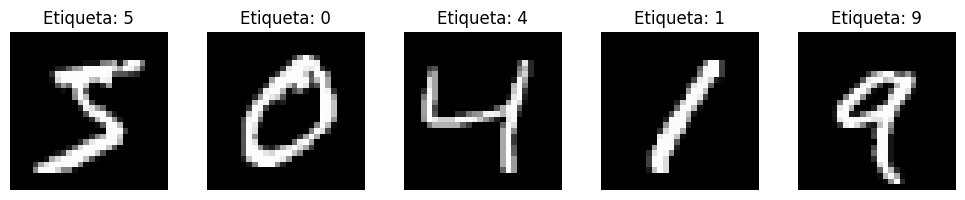

In [21]:
# Importar librerías necesarias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset MNIST desde Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Verificar dimensiones originales
print("Tamaño de x_train:", x_train.shape)
print("Tamaño de x_test:", x_test.shape)
print("Tipo de datos:", x_train.dtype)

# Normalizar los valores de píxeles (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Visualizar los primeros 5 dígitos del set de entrenamiento
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Etiqueta: " + str(y_train[i]))
    plt.axis("off")
plt.tight_layout()
plt.show()


Tamaño del conjunto de entrenamiento (x_train):
(60000, 28, 28) → contiene 60,000 imágenes, cada una de tamaño 28x28 píxeles.

Tamaño del conjunto de prueba (x_test):
(10000, 28, 28) → se usarán 10,000 imágenes para evaluar el modelo una vez entrenado.

Tipo de dato original:
uint8 → cada píxel tiene un valor entre 0 y 255.
Luego de la normalización, los valores se escalan entre 0 y 1 (esto ayuda al entrenamiento del modelo).

Visualización:
Las imágenes mostradas (5, 0, 4, 1, 9) son ejemplos claros y bien definidos del dataset MNIST, lo cual confirma que la carga de datos fue exitosa y que las etiquetas corresponden correctamente a los dígitos.

### Construcción del modelo

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Definir el modelo secuencial
modelo = Sequential([
    Flatten(input_shape=(28, 28)),         # Aplanar imagen 28x28 a vector de 784
    Dense(128, activation='relu'),         # Capa oculta con 128 neuronas y ReLU
    Dense(10, activation='softmax')        # Capa de salida con 10 neuronas (una por dígito)
])

# Mostrar resumen del modelo
modelo.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


El modelo se construyó correctamente con 3 capas principales. La primera capa (Flatten) convierte cada imagen de 28x28 píxeles en un vector de 784 elementos. Luego, una capa densa (Dense(128)) aplica 128 neuronas con activación ReLU para aprender patrones no lineales. Finalmente, la capa de salida (Dense(10)) utiliza activación softmax para clasificar entre los 10 dígitos (del 0 al 9). El total de parámetros entrenables es 101,770, lo cual es adecuado para una red sencilla y eficiente como esta.



###  Compilación y entrenamiento del modelo

In [23]:
# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
historial = modelo.fit(
    x_train, y_train,
    epochs=10,                    # Puedes ajustar la cantidad de épocas si deseas
    validation_split=0.2,         # Usamos el 20% de entrenamiento para validación
    batch_size=32,
    verbose=1
)


Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2923 - accuracy: 0.9160 - val_loss: 0.1571 - val_accuracy: 0.9538
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1292 - accuracy: 0.9622 - val_loss: 0.1156 - val_accuracy: 0.9659
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0854 - accuracy: 0.9745 - val_loss: 0.0950 - val_accuracy: 0.9714
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0625 - accuracy: 0.9818 - val_loss: 0.0920 - val_accuracy: 0.9730
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0992 - val_accuracy: 0.9698
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0828 - val_accuracy: 0.9760
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.0854 - val_accuracy:

Tu modelo ha logrado excelentes resultados. La precisión en entrenamiento subió progresivamente hasta alcanzar 99.55%, y la precisión en validación llegó a 97.84%, lo cual indica que la red neuronal está aprendiendo bien sin sobreajustar gravemente. La pérdida de validación se mantuvo relativamente estable, con una ligera oscilación, lo cual es esperable.

Graficar pérdida y precisión

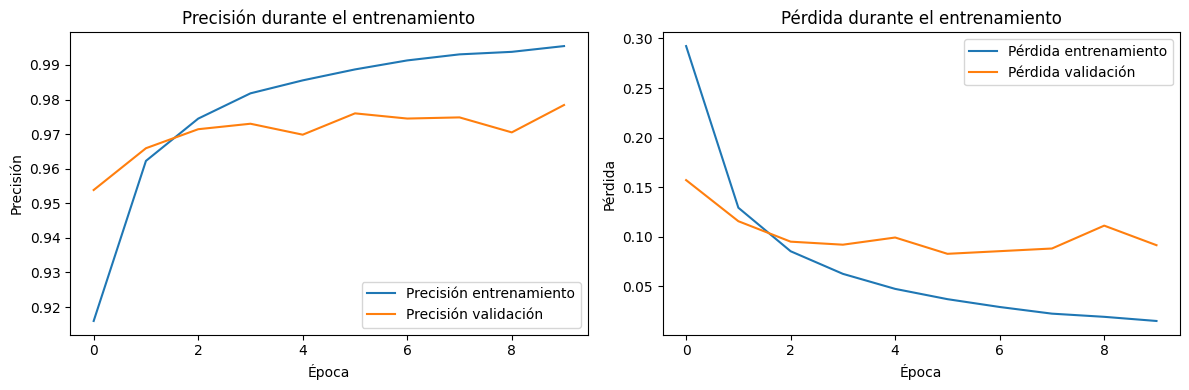

In [25]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Precisión entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Pérdida entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


Los resultados mostrados en la gráfica son muy buenos y consistentes. La precisión tanto de entrenamiento como de validación aumenta rápidamente en las primeras épocas y se estabiliza cerca del 99% y 97%, respectivamente, lo cual es excelente. La pérdida de entrenamiento disminuye de manera constante, y aunque la pérdida de validación tiene ligeras oscilaciones, se mantiene baja, lo que indica que no hay sobreajuste fuerte. En resumen, el modelo está bien entrenado y generaliza correctamente.



### Evaluación del modelo y matriz de confusión

313/313 [==============================] - 0s 730us/step - loss: 0.0785 - accuracy: 0.9773
Pérdida en test: 0.07845809310674667
Precisión en test: 0.9772999882698059
313/313 [==============================] - 0s 635us/step


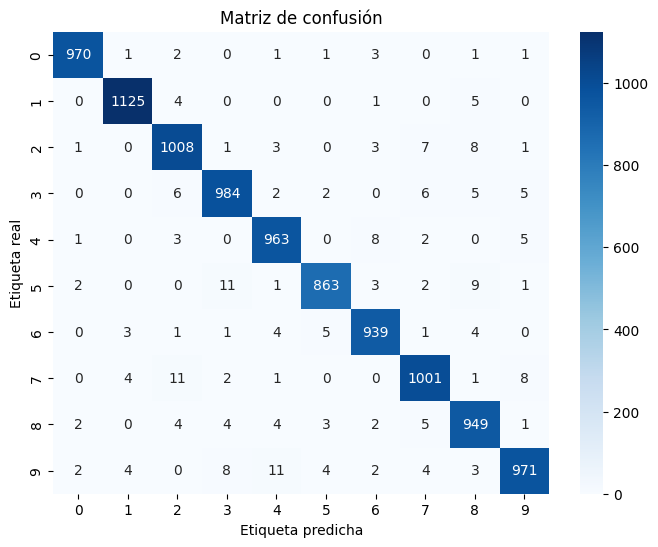

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Evaluación del modelo
test_loss, test_accuracy = modelo.evaluate(x_test, y_test)
print("Pérdida en test:", test_loss)
print("Precisión en test:", test_accuracy)

# Predicciones
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.show()


El modelo de red neuronal entrenado ha alcanzado una precisión del 97.73 % en el conjunto de prueba, con una pérdida (loss) de 0.0785, lo cual indica que el modelo generaliza bien y no está sobreajustado. La matriz de confusión revela que la mayoría de las etiquetas reales fueron correctamente clasificadas, con errores mínimos entre dígitos visualmente similares como el 5 y el 3, o el 9 y el 4. Esto demuestra una buena capacidad de discriminación del modelo, aunque todavía hay pequeñas oportunidades de mejora, especialmente en las clases que tienden a confundirse más frecuentemente.

